In [238]:
%run "Data Cleaning.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   radius1       569 non-null    float64
 1   texture1      569 non-null    float64
 2   perimeter1    569 non-null    float64
 3   area1         569 non-null    float64
 4   radius2       569 non-null    float64
 5   texture2      569 non-null    float64
 6   perimeter2    569 non-null    float64
 7   area2         569 non-null    float64
 8   radius3       569 non-null    float64
 9   texture3      569 non-null    float64
 10  perimeter3    569 non-null    float64
 11  area3         569 non-null    float64
 12  compactness3  569 non-null    float64
 13  concavity3    569 non-null    float64
 14  Diagnosis     569 non-null    object 
dtypes: float64(14), object(1)
memory usage: 66.8+ KB


In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [240]:
# numeric_cols = df.select_dtypes(include='number').columns
# skewness = df[numeric_cols].skew()
# print(skewness)


In [241]:
# skewed_cols = skewness[skewness > 1].index
# df[skewed_cols] = np.log1p(df[skewed_cols])

In [242]:
# numeric_cols = df.select_dtypes(include='number').columns
# skewness = df[numeric_cols].skew()
# print(skewness)


In [243]:
df.head()

,radius1,texture1,perimeter1,area1,radius2,texture2,perimeter2,area2,radius3,texture3,perimeter3,area3,compactness3,concavity3,Diagnosis
0,17.99,10.38,122.80,1001.0,1.0950,0.9053,8.589,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119,1
1,20.57,17.77,132.90,1326.0,0.5435,0.7339,3.398,74.08,24.99,23.41,158.80,1956.0,0.1866,0.2416,1
2,19.69,21.25,130.00,1203.0,0.7456,0.7869,4.585,94.03,23.57,25.53,152.50,1709.0,0.4245,0.4504,1
3,11.42,20.38,77.58,386.1,0.4956,1.1560,3.445,27.23,14.91,26.50,98.87,567.7,0.8663,0.6869,1
4,20.29,14.34,135.10,1297.0,0.7572,0.7813,5.438,94.44,22.54,16.67,152.20,1575.0,0.2050,0.4000,1


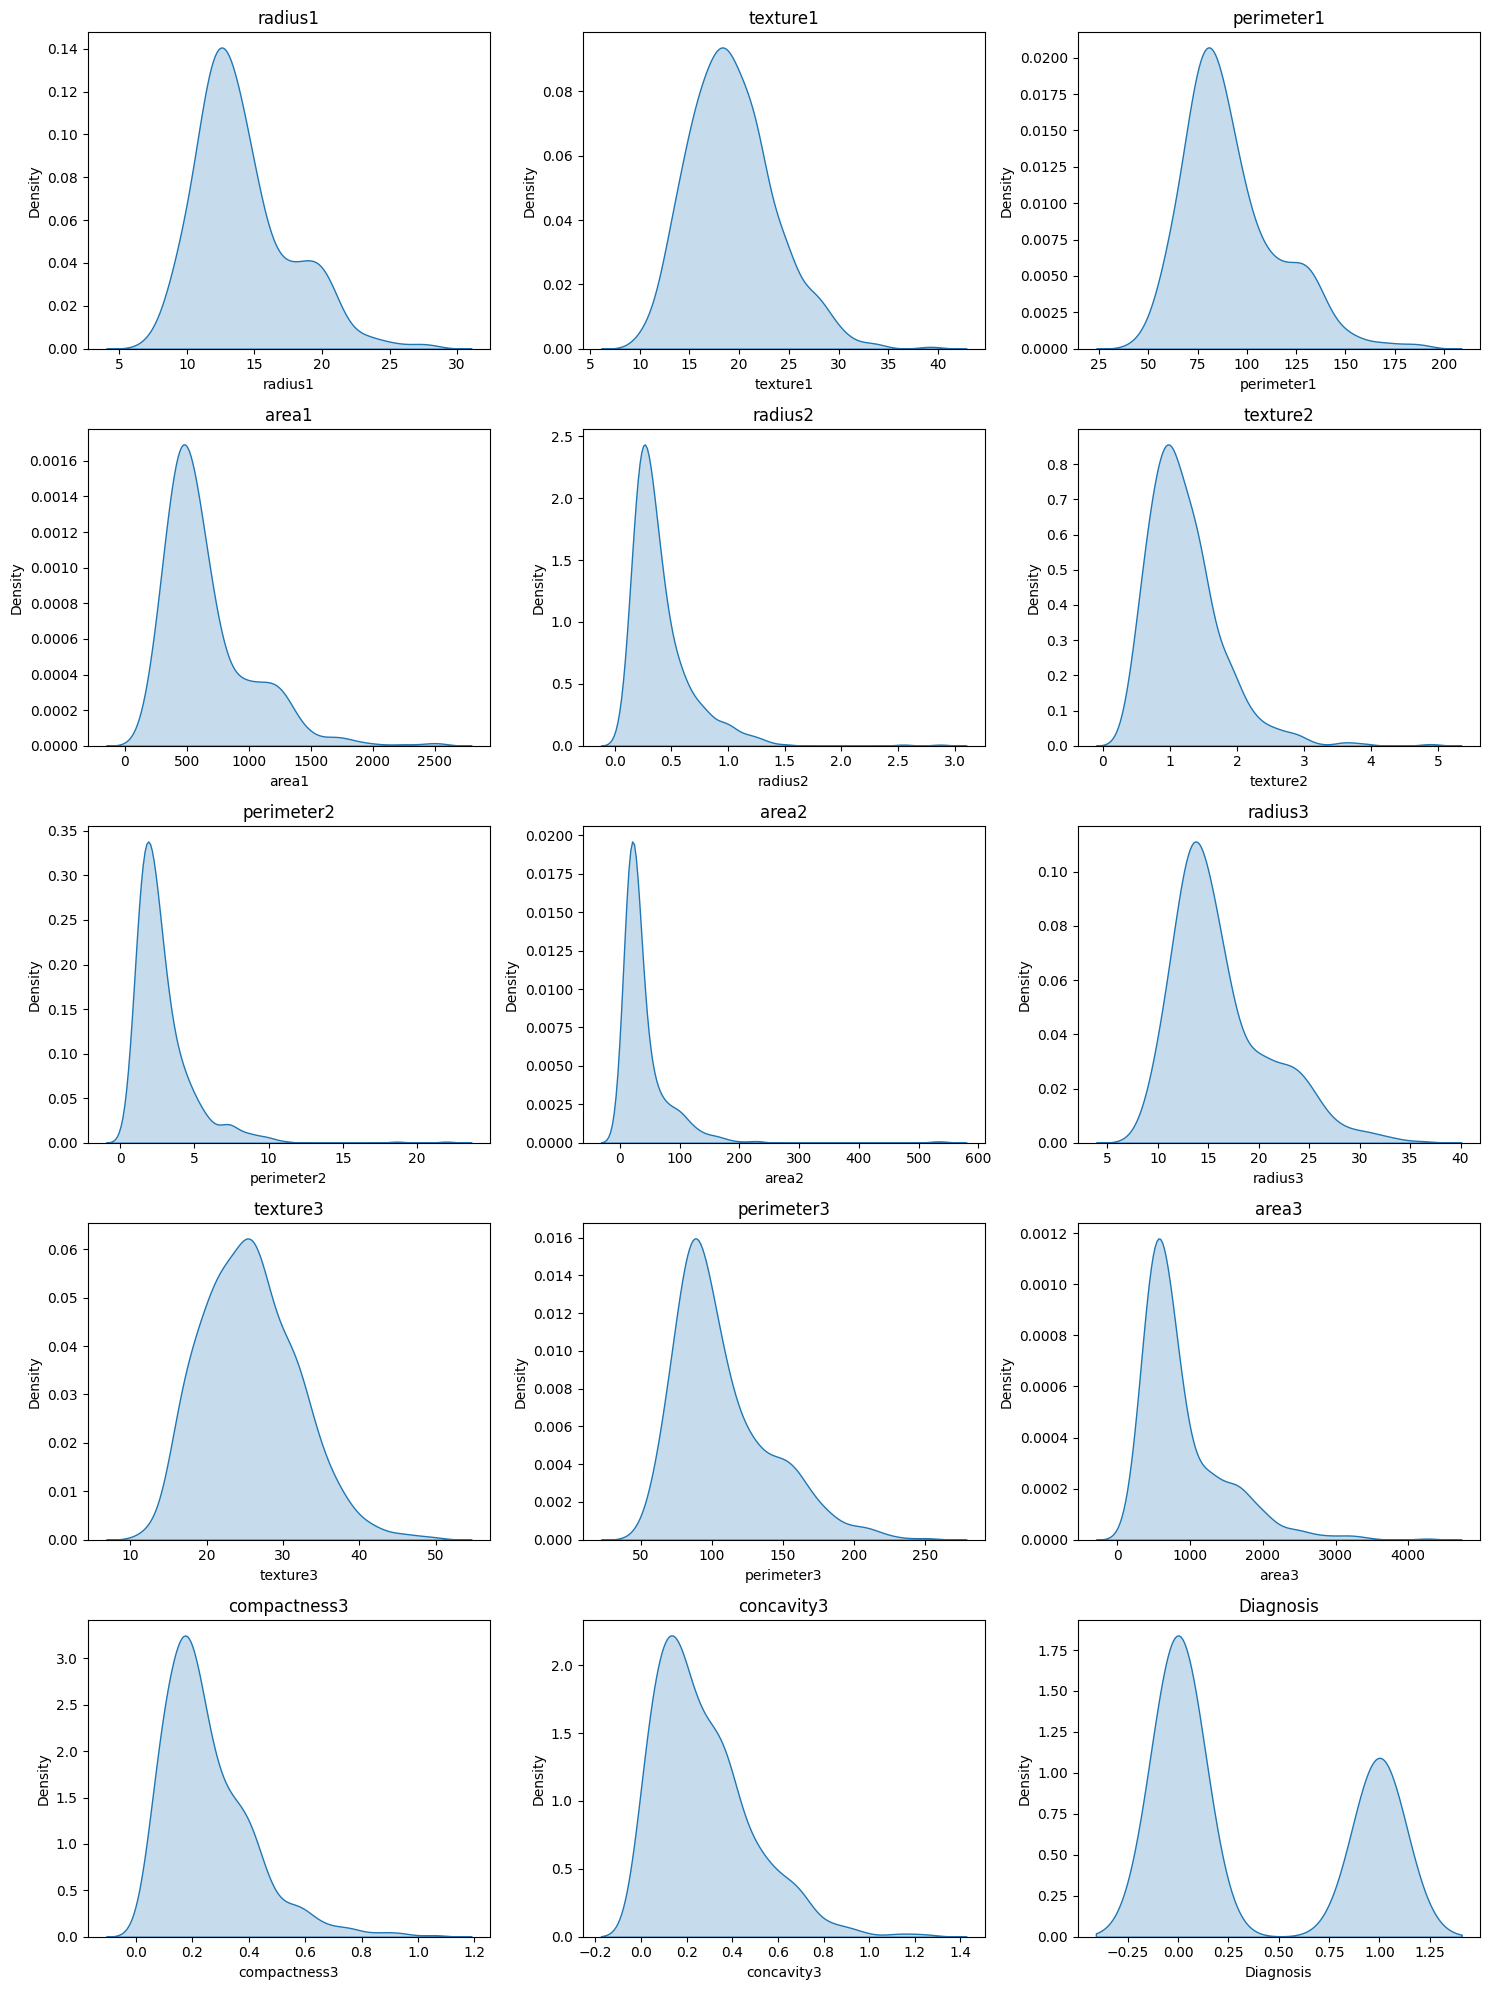

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include='number').columns
num_cols = len(numeric_cols)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(cols_per_row*5, rows*4))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows,cols_per_row,i+1)
    sns.kdeplot(x=df[col],fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()


<Axes: xlabel='Diagnosis', ylabel='count'>

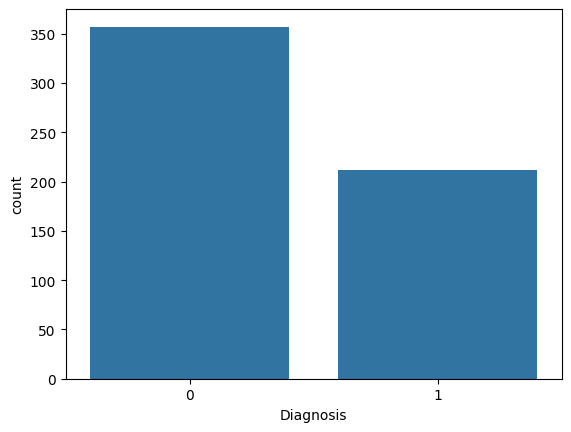

In [245]:
sns.countplot(x=df['Diagnosis'])

In [246]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote=SMOTE(random_state=42)
X_train_bal,y_train_bal=smote.fit_resample(X_train, y_train)

<Axes: xlabel='Diagnosis', ylabel='count'>

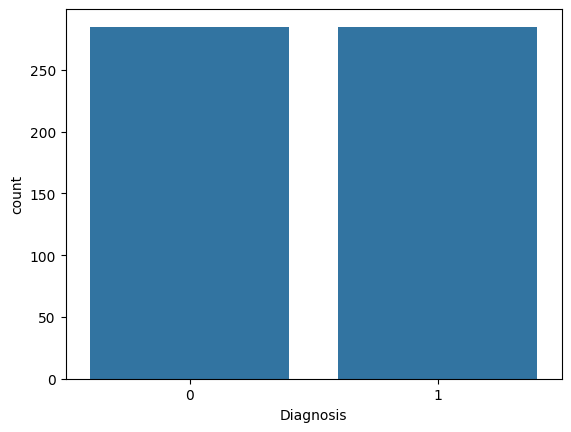

In [247]:
sns.countplot(x=y_train_bal)

In [248]:
X.shape

(569, 14)

In [249]:
df.to_csv('Cleaned Data.csv')

In [256]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

pca=PCA(n_components=7,random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
explained = pca.explained_variance_ratio_.cumsum()
explained_df = pd.DataFrame({
    'component': np.arange(1, len(pca.explained_variance_ratio_)+1),
    'cumulative_explained_variance': explained
})
model=RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_pca, y_train_bal)
y_pred=model.predict(X_test_pca)
print('RandomForestClassification:\n')
print(f'Accuracy:\n{accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification_report:\n{classification_report(y_test,y_pred)}\n')
X_test_pca = pca.transform(X_test_scaled)
model1=LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight={0:1,1:3}
)
model1.fit(X_train_pca,y_train_bal)
y_pred1=model1.predict(X_test_pca)
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model1,f)
column_names=X.columns.tolist()
with open('model_columns.pkl','wb') as f:
    pickle.dump(column_names,f)
with open('pca.pkl','wb') as f:
    pickle.dump(pca,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('model_columns1.pkl','wb') as f:
    pickle.dump(column_names,f)

RandomForestClassification:

Accuracy:
0.956140350877193
Confusion Matrix:
[[71  1]
 [ 4 38]]
Classification_report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




In [251]:
skewed_cols

Index(['area1', 'radius2', 'texture2', 'perimeter2', 'area2', 'radius3',
       'perimeter3', 'area3', 'compactness3', 'concavity3'],
      dtype='object')

In [252]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'radius2', 'texture2',
       'perimeter2', 'area2', 'radius3', 'texture3', 'perimeter3', 'area3',
       'compactness3', 'concavity3'],
      dtype='object')

In [257]:
print('LogisticRegression:\n')
print(f'Accuracy: {accuracy_score(y_test,y_pred1)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred1)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred1)}')

LogisticRegression:

Accuracy: 0.956140350877193
Confusion Matrix:
[[68  4]
 [ 1 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



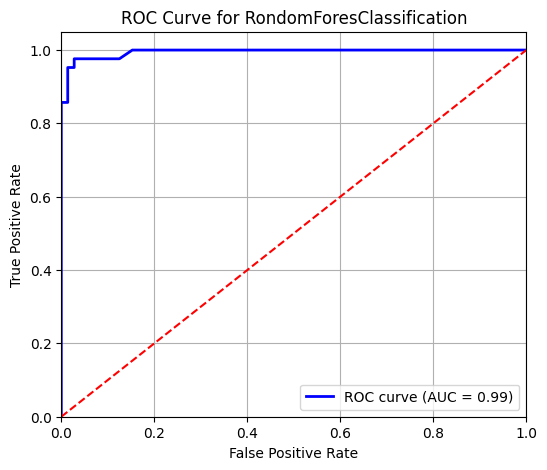

In [258]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RondomForesClassification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


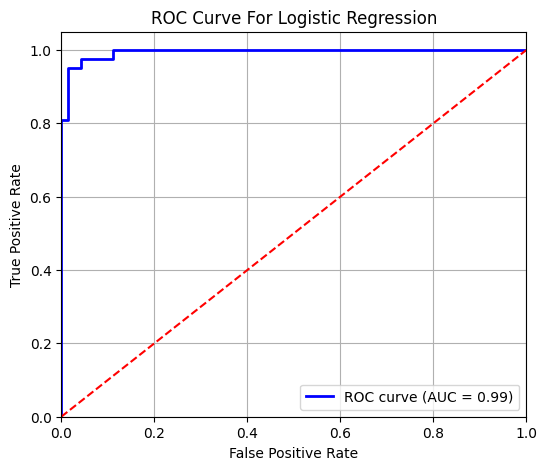

In [260]:
from sklearn.metrics import roc_curve, auc
y_prob1=model1.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_prob1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [235]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,make_scorer,recall_score
recall_malignant=make_scorer(recall_score, pos_label=1)
scaler=StandardScaler()
pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])
param_grid={
    'pca__n_components': [5, 6, 7, 8, 9],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'rf__class_weight': [{0:1, 1:3}, 'balanced']
}
grid=GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=recall_malignant,
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid.fit(X_train_bal, y_train_bal)
print("Best parameters:", grid.best_params_)
y_pred2=grid.predict(X_test)
print(f'Accuracy:{grid.score(X_test,y_test)}')
print(f'Confusion Matrix:\n"{confusion_matrix(y_test,y_pred2)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred2)}')


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'pca__n_components': 6, 'rf__class_weight': {0: 1, 1: 3}, 'rf__max_depth': 5, 'rf__n_estimators': 100}
Accuracy:0.9523809523809523
Confusion Matrix:
"[[70  2]
 [ 2 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [236]:
from sklearn.metrics import precision_score,recall_score,f1_score
table=pd.DataFrame({
    'Evaluation Metrics':['Accuracy','Precision(0)','Precision(1)','recall(0)','recall(1)','f1_score(0)','f1_score(0)','confusion_matrix'],
    'RandomForestClassifier':[accuracy_score(y_test,y_pred),precision_score(y_test,y_pred,pos_label=0),precision_score(y_test,y_pred,pos_label=1),recall_score(y_test,y_pred,pos_label=0),recall_score(y_test,y_pred,pos_label=1),f1_score(y_test,y_pred,pos_label=0),f1_score(y_test,y_pred,pos_label=1),confusion_matrix(y_test,y_pred)],
    'Logistic Regression':[accuracy_score(y_test,y_pred1),precision_score(y_test,y_pred1,pos_label=0),precision_score(y_test,y_pred1,pos_label=1),recall_score(y_test,y_pred1,pos_label=0),recall_score(y_test,y_pred1,pos_label=1),f1_score(y_test,y_pred1,pos_label=0),f1_score(y_test,y_pred1,pos_label=1),confusion_matrix(y_test,y_pred1)],
    'RandomForestClassifier with tuning':[accuracy_score(y_test,y_pred2),precision_score(y_test,y_pred2,pos_label=0),precision_score(y_test,y_pred2,pos_label=1),recall_score(y_test,y_pred2,pos_label=0),recall_score(y_test,y_pred2,pos_label=1),f1_score(y_test,y_pred2,pos_label=0),f1_score(y_test,y_pred2,pos_label=1),confusion_matrix(y_test,y_pred2)]
})

In [237]:
table

,Evaluation Metrics,RandomForestClassifier,Logistic Regression,RandomForestClassifier with tuning
0,Accuracy,0.95614,0.95614,0.964912
1,Precision(0),0.946667,0.985507,0.972222
2,Precision(1),0.974359,0.911111,0.952381
3,recall(0),0.986111,0.944444,0.972222
4,recall(1),0.904762,0.97619,0.952381
5,f1_score(0),0.965986,0.964539,0.972222
6,f1_score(0),0.938272,0.942529,0.952381
7,confusion_matrix,"[[71, 1], [4, 38]]","[[68, 4], [1, 41]]","[[70, 2], [2, 40]]"
